In [121]:
import nltk
from nltk.corpus import brown
import re

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Import lexicon
from nltk.corpus import words
lex = words.words('en')

In [122]:
# Prefixes of interest
prefixes = "un|non|dis|in"

# Function to replace treebank tag with a wordnet tag to use with the Lemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        # Unfortunately, wordnet only supports adjective, verb, noun and adverb parts of speech
        # So, any word whose POS is not covered by wordnet will default to NOUN
        return wordnet.NOUN

def tokenize(corpus):
    return corpus.words()

def tuplize(matched_word):  
    word = matched_word[0]
    tag = matched_word[1]
    # Separate prefix from stem
    prefix = re.match(prefixes, word).group(0)
    stem = re.sub(prefix, '', word, count=1)
    lem_stem = wordnet_lemmatizer.lemmatize(stem, pos=(get_wordnet_pos(tag)))
    return (word, tag, prefix, stem, lem_stem)
        
corpus_words = tokenize(brown)

In [123]:
# Step 1: Get all tokens that have prefixes of interest
pattern = r'\bun\w+|\bnon\w+|\bdis\w+|\bin\w+'
prefixed_words = list(set([w for w in corpus_words if re.match(pattern, w) and len(w) > 3]))

# Step 2: Tag words
# Words_tagged is a list of tuples containing (word, tag)
words_tagged = nltk.pos_tag(prefixed_words)

In [124]:
words_of_interest = [tuplize(w) for w in words_tagged]
print("Matched words = {}".format(len(words_of_interest)))

# Step 3: Get rid of erroneous words of interest
# Check if stem is in the lexicon
# If so, the prefix is negating and keep the word
# If not, discard the word
filtered = [w for w in words_of_interest if w[4] in lex]

print("Matched words after filtering = {}".format(len(filtered)))

Matched words = 2304
Matched words after filtering = 1220


In [125]:
filtered_words = [f[0] for f in filtered]
prefixes = "un|non|dis|in"

In [134]:
# Step 3: Analysis

# Token frequency: Number of actual words formed according to a certain pattern over the corpus
size = len(corpus_words)
un_tk_freq = non_tk_freq = dis_tk_freq = in_tk_freq = 0
for c in corpus_words:
    if c in filtered_words:
        # Compute frequencies
        prefix = re.match(prefixes, c).group(0)
        if prefix == "un":
            un_tk_freq += 1
        elif prefix == "non":
            non_tk_freq += 1
        elif prefix == "dis":
            dis_tk_freq += 1
        else:
            in_tk_freq += 1

un_tk_freq /= size
non_tk_freq /= size
dis_tk_freq /= size
in_tk_freq /= size
    
print(un_tk_freq)
print(non_tk_freq)
print(dis_tk_freq)
print(in_tk_freq)

0.0018963272223714942
8.956313856795431e-05
0.0011979069783463888
0.0030373960550882195


In [127]:
# Type frequency: Number of unique words formed according to a certain pattern over the lexicon

size = len(filtered)
un_ty_freq = non_ty_freq = dis_ty_freq = in_ty_freq = 0
for f in filtered:
    word = f[0]
    tag = f[1]
    prefix = f[2]
    stem = f[3]
    lem_stem = f[4]
    # Compute frequencies
    if prefix == "un":
        un_ty_freq += 1
    elif prefix == "non":
        non_ty_freq += 1
    elif prefix == "dis":
        dis_ty_freq += 1
    else:
        in_ty_freq += 1

un_ty_freq /= size
non_ty_freq /= size
dis_ty_freq /= size
in_ty_freq /= size
un_ty_freq *= 100
non_ty_freq *= 100
dis_ty_freq *= 100
in_ty_freq *= 100
    
print(un_ty_freq)
print(non_ty_freq)
print(dis_ty_freq)
print(in_ty_freq)

41.885245901639344
4.098360655737705
20.81967213114754
33.19672131147541


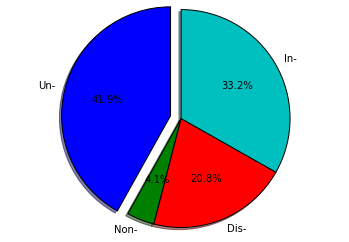

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Un-', 'Non-', 'Dis-', 'In-'
sizes = [un_ty_freq, non_ty_freq, dis_ty_freq, in_ty_freq]
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()